In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import chi2, mutual_info_classif, f_classif, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from FS.ssa import jfs   # change this to switch algorithm 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
Df = pd.read_csv("Datasets/colon_cancer.csv")

In [3]:
Df.head(5)

,samples,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V1992,V1993,V1994,V1995,V1996,V1997,V1998,V1999,V2000,response
0,1,3.622527,3.308826,2.986154,2.710537,2.091310,3.119126,2.745517,2.421422,3.352726,...,-1.026668,-0.983356,-0.531104,-1.142698,-1.108899,-0.520386,-0.314519,-1.764190,-2.749956,normal
1,2,3.470277,3.681609,3.425553,3.046109,2.402400,2.460531,2.150405,2.256655,3.020793,...,-1.232504,-3.063926,0.156281,-0.687025,-0.777089,-1.093455,-1.213857,-1.062064,-2.126398,normal
2,3,3.018884,2.783578,2.569772,3.211390,2.707560,2.632832,2.385288,3.001862,2.633958,...,-0.757976,0.318488,-1.251425,-1.099859,-0.130810,-2.748068,-1.014786,-2.260031,-1.496573,normal
3,4,3.097915,2.863956,2.772942,3.186238,2.354082,2.758829,2.103475,2.932663,3.176524,...,-1.175068,0.079492,-1.074746,-0.465491,-0.454513,-1.804783,-1.606205,-1.223450,-1.066161,normal
4,5,3.007979,2.905384,2.560548,3.253039,2.336800,3.040030,2.881109,2.548497,2.852425,...,-0.490512,-0.081214,-1.155846,-0.889998,-0.527681,-1.636024,-1.210256,-1.232686,-1.618022,normal


In [4]:
#D = pd.DataFrame(Df.columns)
#D

In [5]:
Df = Df.drop("samples", axis = 1)

In [6]:
#display(Df)

In [7]:
Df.isnull().sum()

V1          0
V2          0
V3          0
V4          0
V5          0
           ..
V1997       0
V1998       0
V1999       0
V2000       0
response    0
Length: 2001, dtype: int64

In [8]:
Df.shape

(62, 2001)

<AxesSubplot:xlabel='response'>

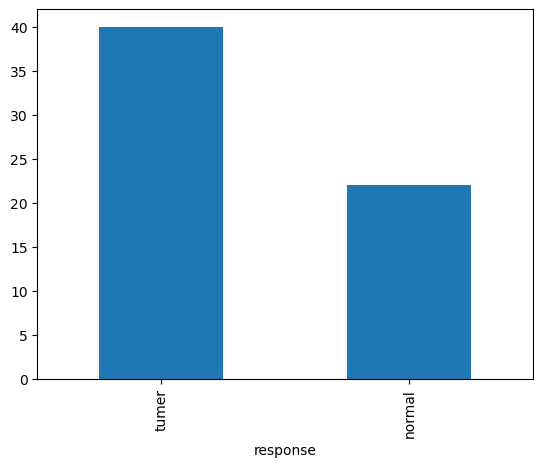

In [9]:
Df.value_counts("response").plot(kind = 'bar')

In [10]:
lb = LabelEncoder()
Df["response"] = lb.fit_transform(Df["response"])

In [11]:
#Df["Response"]

In [12]:
Df = Df.apply(pd.to_numeric)

In [13]:
Df1 = Df.copy()

In [14]:
x = Df.drop(["response"], axis = 1)

In [15]:
y= Df1.loc[:,['response']]

In [16]:
#sc = StandardScaler()
#x1 = sc.fit_transform(x)

In [17]:
x = np.abs(x)

In [18]:
x1 = x.copy()

In [19]:
y1 = y.copy()

In [20]:
#y = np.ravel(y)

In [21]:
#Now we apply our feature selection

In [22]:
#SELECTION WITH CHI-SQUARE TEST
fitt = SelectKBest(score_func = chi2, k = 100)
fitt.fit(x,y)

SelectKBest(k=100, score_func=<function chi2 at 0x000001F22EF545E0>)

In [23]:
TabelScores = pd.DataFrame(fitt.scores_)
TabelFeatures = pd.DataFrame(x.columns)
GeneralTable = pd.concat([TabelFeatures, TabelScores], axis = 1)
GeneralTable.columns = ['Features', 'scores']

In [24]:
GeneralTable.sort_values(by = 'scores', ascending = False, inplace = True)

In [25]:
display(GeneralTable)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

,Features,scores
248,V249,2.041874e+01
244,V245,1.599961e+01
764,V765,1.572433e+01
266,V267,1.500952e+01
492,V493,1.475981e+01
...,...,...
1872,V1873,4.872137e-06
204,V205,2.620829e-06
1730,V1731,1.383357e-06
1722,V1723,1.570893e-07


In [26]:
top_Num = GeneralTable.head(50)

In [27]:
display(top_Num)

,Features,scores
248,V249,20.418740
244,V245,15.999608
764,V765,15.724334
266,V267,15.009519
492,V493,14.759808
1634,V1635,10.980874
821,V822,10.904851
1581,V1582,9.260411
1770,V1771,8.393413
376,V377,8.185039


In [28]:
#SELECTION WITH MUTUAL INFORMATION
y1 = np.ravel(y1)
fitt1 = SelectKBest(score_func = mutual_info_classif, k = 10)
fitt1.fit(x1,y1)

SelectKBest(score_func=<function mutual_info_classif at 0x000001F22EF70EE0>)

In [29]:
TableScores1 = pd.DataFrame(fitt1.scores_)
TableFeatures1 = pd.DataFrame(x1.columns)
GeneralTable1 = pd.concat([TableFeatures1, TableScores1], axis = 1)
GeneralTable1.columns = ['Features', 'scores']


In [30]:
GeneralTable1.sort_values(by = 'scores', ascending = False, inplace = True)

In [31]:
display(GeneralTable1)

,Features,scores
1962,V1963,0.321636
506,V507,0.290791
512,V513,0.290370
376,V377,0.287110
624,V625,0.281838
1226,V1227,0.276422
248,V249,0.269609
358,V359,0.267067
266,V267,0.244151
1634,V1635,0.242390


In [32]:
top_Num1 = GeneralTable1.head(50)
display(top_Num1)

,Features,scores
1962,V1963,0.321636
506,V507,0.290791
512,V513,0.290370
376,V377,0.287110
624,V625,0.281838
1226,V1227,0.276422
248,V249,0.269609
358,V359,0.267067
266,V267,0.244151
1634,V1635,0.242390


In [33]:
MergeTables = pd.concat([top_Num, top_Num1], axis = 0)

In [34]:
display(MergeTables)

,Features,scores
248,V249,20.418740
244,V245,15.999608
764,V765,15.724334
266,V267,15.009519
492,V493,14.759808
1634,V1635,10.980874
821,V822,10.904851
1581,V1582,9.260411
1770,V1771,8.393413
376,V377,8.185039


In [35]:
Duplicates = MergeTables.duplicated(subset = 'Features')

In [36]:
display(Duplicates)

248     False
244     False
764     False
266     False
492     False
1634    False
821     False
1581    False
1770    False
376     False
738     False
414     False
1771    False
512     False
624     False
1410    False
1769    False
1647    False
1670    False
779     False
1667    False
1673    False
1891    False
285     False
1896    False
1386    False
1982    False
896     False
142     False
1869    False
1883    False
200     False
1413    False
917     False
806     False
390     False
1345    False
1001    False
829     False
1842    False
1678    False
364     False
1284    False
450     False
909     False
805     False
1380    False
1596    False
1923    False
65      False
1962    False
506     False
512      True
376      True
624      True
1226    False
248      True
358     False
266      True
1634     True
1581     True
492      True
764      True
1582    False
1364    False
1771     True
13      False
285      True
95      False
805      True
244      True
1726  

In [37]:
DropDuplicates = MergeTables.drop_duplicates(subset = 'Features', keep = 'first')

In [38]:
display(DropDuplicates)

,Features,scores
248,V249,20.418740
244,V245,15.999608
764,V765,15.724334
266,V267,15.009519
492,V493,14.759808
1634,V1635,10.980874
821,V822,10.904851
1581,V1582,9.260411
1770,V1771,8.393413
376,V377,8.185039


In [39]:
DropDuplicates.shape

(79, 2)

In [40]:
DropDuplicates.head(50)

,Features,scores
248,V249,20.418740
244,V245,15.999608
764,V765,15.724334
266,V267,15.009519
492,V493,14.759808
1634,V1635,10.980874
821,V822,10.904851
1581,V1582,9.260411
1770,V1771,8.393413
376,V377,8.185039


In [41]:
xx = Df[['V249','V245','V765','V267','V493','V1635','V822','V1582','V1771','V377',
         'V739','V415','V1772','V513','V625','V1411','V1770','V1648','V1671','V780',
         'V1668','V1674','V1892','V286','V1897','V1387','V1983','V897','V143','V1870',
         'V1884','V201','V1414','V918','V807','V391','V1346','V1002','V830','V1843','V1679',
         'V365','V1285','V451','V910','V806','V138','V1597','V192','V66']]


In [42]:
#yy = yy.reshape(xx.shape)
xx.head(4)

,V249,V245,V765,V267,V493,V1635,V822,V1582,V1771,V377,V739,V415,V1772,V513,V625,V1411,V1770,V1648,V1671,V780,V1668,V1674,V1892,V286,V1897,V1387,V1983,V897,V143,V1870,V1884,V201,V1414,V918,V807,V391,V1346,V1002,V830,V1843,V1679,V365,V1285,V451,V910,V806,V138,V1597,V192,V66
0,2.231491,1.888216,1.965824,1.926576,1.681005,0.041893,2.885762,-1.193479,-1.173433,1.107265,1.780115,2.652427,-1.584033,0.558446,0.810918,1.474758,-1.048061,-1.440829,-2.398794,0.168632,-0.468374,-0.481712,-0.071766,2.241400,-0.887609,2.254121,-0.721758,1.397938,0.481836,-0.886011,-0.979039,2.667982,0.562090,1.421872,2.869949,0.667304,-1.363999,1.228655,0.877048,0.623026,-0.818059,-0.199948,-0.007571,1.338872,-0.012739,1.257297,0.692319,-1.237899,0.927810,2.049503
1,1.738963,1.233675,1.446530,1.267408,1.361292,-0.899772,2.014939,-1.362908,-1.648777,0.685592,0.873254,2.414908,-1.620224,0.262584,0.819693,-1.880520,-2.587487,-1.297055,-1.371193,0.370854,-0.027267,0.066492,-1.290924,2.184533,-1.671641,1.195600,-0.658216,1.590496,1.091964,-0.193340,-1.670996,1.860656,-0.199736,1.490916,1.885927,0.463182,-1.131325,0.873050,0.421912,-0.503161,-0.236226,0.274147,0.186527,-0.318509,0.336580,0.780433,1.203431,-0.899770,1.332205,0.976626
2,2.817083,2.498496,2.453886,2.510801,1.239221,-0.023175,1.388148,-0.295681,-0.952563,0.593760,1.171269,1.420579,-0.601467,0.624859,0.325928,1.189640,-1.682331,-1.312987,-1.077815,0.286446,-0.089371,-1.171307,0.094791,3.058117,-0.297100,1.260946,-1.642952,1.254874,1.679317,-1.034464,-0.751658,1.821511,0.330960,0.658642,1.905424,-0.347072,-0.376904,-0.265966,-0.066917,0.296442,-2.133072,0.930529,-0.528184,0.739755,-0.208802,0.742597,1.349019,-0.454349,0.949900,2.710349
3,3.063591,2.351759,2.315695,2.288429,1.270279,-0.579003,1.978901,-1.031200,-1.938469,0.855857,1.083827,1.699747,-1.194307,0.537699,-0.175292,0.429508,-2.176462,-1.244386,-0.984862,0.210309,-0.347675,-0.657776,-2.007502,1.809730,-2.031852,1.515332,-3.129875,0.922144,2.829380,-1.483933,-1.267614,1.549430,0.292915,0.092119,3.101940,0.411028,-1.241355,-1.634305,0.030084,-0.386734,-1.069535,0.682338,-0.375823,0.670951,-0.263049,0.884041,1.415760,-0.186540,1.707601,1.830922


In [43]:
yy = Df['response']

In [44]:
yy

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    1
41    1
42    1
43    1
44    1
45    1
46    1
47    1
48    1
49    1
50    1
51    1
52    1
53    1
54    1
55    1
56    1
57    1
58    1
59    1
60    1
61    1
Name: response, dtype: int32

In [45]:
xx = np.abs(xx)

In [46]:
xx.head(4)

,V249,V245,V765,V267,V493,V1635,V822,V1582,V1771,V377,V739,V415,V1772,V513,V625,V1411,V1770,V1648,V1671,V780,V1668,V1674,V1892,V286,V1897,V1387,V1983,V897,V143,V1870,V1884,V201,V1414,V918,V807,V391,V1346,V1002,V830,V1843,V1679,V365,V1285,V451,V910,V806,V138,V1597,V192,V66
0,2.231491,1.888216,1.965824,1.926576,1.681005,0.041893,2.885762,1.193479,1.173433,1.107265,1.780115,2.652427,1.584033,0.558446,0.810918,1.474758,1.048061,1.440829,2.398794,0.168632,0.468374,0.481712,0.071766,2.241400,0.887609,2.254121,0.721758,1.397938,0.481836,0.886011,0.979039,2.667982,0.562090,1.421872,2.869949,0.667304,1.363999,1.228655,0.877048,0.623026,0.818059,0.199948,0.007571,1.338872,0.012739,1.257297,0.692319,1.237899,0.927810,2.049503
1,1.738963,1.233675,1.446530,1.267408,1.361292,0.899772,2.014939,1.362908,1.648777,0.685592,0.873254,2.414908,1.620224,0.262584,0.819693,1.880520,2.587487,1.297055,1.371193,0.370854,0.027267,0.066492,1.290924,2.184533,1.671641,1.195600,0.658216,1.590496,1.091964,0.193340,1.670996,1.860656,0.199736,1.490916,1.885927,0.463182,1.131325,0.873050,0.421912,0.503161,0.236226,0.274147,0.186527,0.318509,0.336580,0.780433,1.203431,0.899770,1.332205,0.976626
2,2.817083,2.498496,2.453886,2.510801,1.239221,0.023175,1.388148,0.295681,0.952563,0.593760,1.171269,1.420579,0.601467,0.624859,0.325928,1.189640,1.682331,1.312987,1.077815,0.286446,0.089371,1.171307,0.094791,3.058117,0.297100,1.260946,1.642952,1.254874,1.679317,1.034464,0.751658,1.821511,0.330960,0.658642,1.905424,0.347072,0.376904,0.265966,0.066917,0.296442,2.133072,0.930529,0.528184,0.739755,0.208802,0.742597,1.349019,0.454349,0.949900,2.710349
3,3.063591,2.351759,2.315695,2.288429,1.270279,0.579003,1.978901,1.031200,1.938469,0.855857,1.083827,1.699747,1.194307,0.537699,0.175292,0.429508,2.176462,1.244386,0.984862,0.210309,0.347675,0.657776,2.007502,1.809730,2.031852,1.515332,3.129875,0.922144,2.829380,1.483933,1.267614,1.549430,0.292915,0.092119,3.101940,0.411028,1.241355,1.634305,0.030084,0.386734,1.069535,0.682338,0.375823,0.670951,0.263049,0.884041,1.415760,0.186540,1.707601,1.830922


In [47]:
xx.shape

(62, 50)

In [48]:
xx = xx.values

In [49]:
xx

array([[2.23149146, 1.88821575, 1.96582396, ..., 1.23789926, 0.92781001,
        2.0495032 ],
       [1.73896286, 1.23367491, 1.4465304 , ..., 0.89977026, 1.33220542,
        0.97662648],
       [2.81708305, 2.49849586, 2.45388605, ..., 0.45434933, 0.94989956,
        2.71034915],
       ...,
       [0.18052489, 0.17905509, 0.19770675, ..., 0.63724534, 1.87863961,
        0.96732199],
       [0.46118152, 0.11076184, 1.15666947, ..., 0.58535114, 1.64050348,
        1.39433044],
       [0.06709961, 0.12502974, 0.12976332, ..., 0.69307044, 0.29075119,
        0.72327424]])

In [50]:
yy = yy.values

In [51]:
yy

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [52]:
x_train, x_test, y_train, y_test = train_test_split(xx, yy, test_size = 0.3, stratify = yy)

In [53]:
fold = {'xt':x_train, 'yt': y_train, 'xv': x_test, 'yv': y_test}

In [54]:
#now we set parameters fr our GREY WOLF OPTIMIZER
K = 5
N = 20
T = 20
options = {'k': K, 'fold': fold, 'N': N, 'T': T}

'''
## Firefly Algorithm (FA)
#FA contains 4 extra parameters

alpha  = 1       # constant
beta0  = 1       # light amplitude
gamma  = 1       # absorbtion coefficient
theta  = 0.97    # control alpha
options = {'k':K, 'fold':fold, 'N':N, 'T':T, 'alpha':alpha, 'beta0':beta0, 'gamma':gamma, 'theta':theta}'''


"\n## Firefly Algorithm (FA)\n#FA contains 4 extra parameters\n\nalpha  = 1       # constant\nbeta0  = 1       # light amplitude\ngamma  = 1       # absorbtion coefficient\ntheta  = 0.97    # control alpha\noptions = {'k':K, 'fold':fold, 'N':N, 'T':T, 'alpha':alpha, 'beta0':beta0, 'gamma':gamma, 'theta':theta}"

In [55]:
fmdl = jfs(xx, yy, options)
sf = fmdl['sf']

Iteration: 1
Best (SSA): 0.10781052631578947
Iteration: 2
Best (SSA): 0.10781052631578947
Iteration: 3
Best (SSA): 0.10761052631578946
Iteration: 4
Best (SSA): 0.10761052631578946
Iteration: 5
Best (SSA): 0.10761052631578946
Iteration: 6
Best (SSA): 0.10761052631578946
Iteration: 7
Best (SSA): 0.10761052631578946
Iteration: 8
Best (SSA): 0.10761052631578946
Iteration: 9
Best (SSA): 0.10761052631578946
Iteration: 10
Best (SSA): 0.10761052631578946
Iteration: 11
Best (SSA): 0.10761052631578946
Iteration: 12
Best (SSA): 0.10761052631578946
Iteration: 13
Best (SSA): 0.10761052631578946
Iteration: 14
Best (SSA): 0.10761052631578946
Iteration: 15
Best (SSA): 0.10761052631578946
Iteration: 16
Best (SSA): 0.10761052631578946
Iteration: 17
Best (SSA): 0.10761052631578946
Iteration: 18
Best (SSA): 0.10761052631578946
Iteration: 19
Best (SSA): 0.10761052631578946
Iteration: 20
Best (SSA): 0.10761052631578946


In [56]:
print(sf)

[ 2  5  6  7  8  9 14 15 19 21 29 32 34 36 42 47 48]


In [57]:
num_train = np.size(x_train,0)
num_test = np.size(x_test,0)
xtrain = x_train[:,sf]
ytrain = y_train.reshape(num_train)
xtest = x_test[:,sf]
ytest = y_test.reshape(num_test)


In [58]:
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(xtrain, ytrain)

KNeighborsClassifier()

In [59]:
#Claculation for accuracy
y_pred = model.predict(xtest)
acc = accuracy_score(ytest, y_pred)
print('The accuracy is: ',round(acc,2))

The accuracy is:  0.89


In [60]:
#Checking for the number of features
Nfea = len(sf)
print('The number of selected features is: ', str(Nfea))

The number of selected features is:  17


In [61]:
f_mea = classification_report(ytest, y_pred)
print(f_mea)

              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       1.00      0.83      0.91        12

    accuracy                           0.89        19
   macro avg       0.89      0.92      0.89        19
weighted avg       0.92      0.89      0.90        19



In [62]:
cm = confusion_matrix(ytest, y_pred)

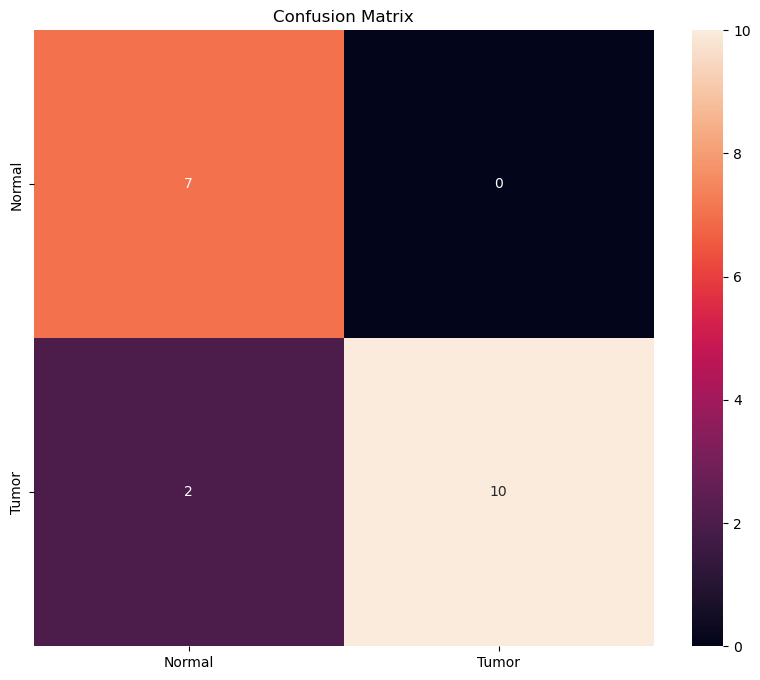

In [63]:
plt.figure(figsize=(10, 8))
ax = sns.heatmap(cm, annot = True, fmt="d", xticklabels=["Normal", "Tumor"], 
                 yticklabels=["Normal", "Tumor"])
ax.set(title="Confusion Matrix");

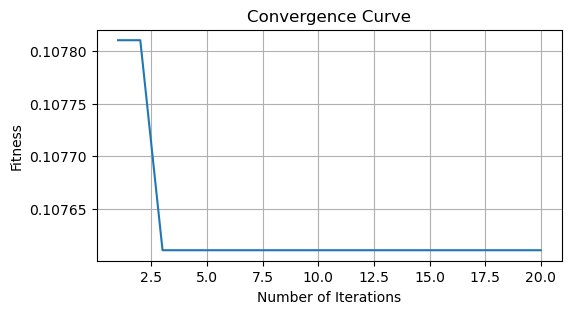

In [64]:
#Now we finally plot the conversgence curve. MY DREAM 

curve = fmdl['c']
curve = curve.reshape(np.size(curve, 1))
x = np.arange(0,options['T'], 1.0)+1.0

Fig, ax = plt.subplots(figsize = (6,3))
#ax.plot(x, curve, 'o-')
plt.plot(x, curve)
plt.xlabel('Number of Iterations', fontsize = 10)
plt.ylabel('Fitness', fontsize = 10)
plt.title('Convergence Curve', fontsize = 12)
plt.grid()
plt.show()